In [1]:
%load_ext autotime
from dpks.quant_matrix import QuantMatrix
import numpy as np
import seaborn as sns

time: 243 ms (started: 2022-06-22 16:01:51 +02:00)


In [2]:
norm_method = "mean"

normalized_data = []

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv"
)

compared_data = (
    quant_matrix
        .filter()
        .normalize(
            method=norm_method,
            log_transform=True,
            use_rt_sliding_window_filter=True,
            minimum_data_points=100,
            stride=5,
            use_overlapping_windows=True,
            rt_unit="seconds"
        )
        .quantify(method="maxlfq", level="protein", threads=10)
        .compare_groups(
            method="linregress",
            group_a=4,
            group_b=6,
            min_samples_per_group=2,
            level="protein",
            multiple_testing_correction_method="fdr_bh"
        )
)

compared_data.row_annotations["Species"] = np.where(compared_data.row_annotations["Protein"].str.contains("MOUSE"), "MOUSE",
                        np.where(compared_data.row_annotations["Protein"].str.contains("YEAST"), "YEAST",
                        np.where(compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE")))


normalized_data.append(compared_data)



time: 21.8 s (started: 2022-06-22 16:02:01 +02:00)


In [7]:
quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv"
)

compared_data = (
    quant_matrix
        .filter()
        .normalize(
            method=norm_method,
            log_transform=True,
            use_rt_sliding_window_filter=False,
        )
        .quantify(method="top_n", level="protein", top_n=1)
        .compare_groups(
            method="linregress",
            group_a=4,
            group_b=6,
            min_samples_per_group=2,
            level="protein",
            multiple_testing_correction_method="fdr_bh"
        )
)

compared_data.row_annotations["Species"] = np.where(compared_data.row_annotations["Protein"].str.contains("MOUSE"), "MOUSE",
                        np.where(compared_data.row_annotations["Protein"].str.contains("YEAST"), "YEAST",
                        np.where(compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE")))


normalized_data.append(compared_data)

time: 13.9 s (started: 2022-06-22 16:03:23 +02:00)


In [10]:
compared_data.to_df()

,Protein,Group4Mean,Group6Mean,Log2FoldChange4-6,PValues4-6,Group4RepCounts,Group6RepCounts,CorrectedPValue,Species,AAS_P2009_167,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,sp|P99027|RLA2_MOUSE,24.748734,24.612329,0.136404,3.914172e-04,9,9,1.382248e-03,MOUSE,24.568123,...,24.702908,24.520780,24.751944,24.573287,24.610403,24.686264,24.671814,24.729861,24.610803,24.648318
1,sp|P32324|EF2_YEAST,26.827913,25.689848,1.138064,5.862236e-02,9,9,9.697080e-02,YEAST,26.563371,...,26.656368,26.598113,26.910054,26.638837,26.709865,26.793996,22.778577,26.835451,22.720449,26.688945
2,sp|P26040|EZRI_MOUSE,25.147495,25.057209,0.090285,4.163758e-03,9,9,9.949871e-03,MOUSE,24.983936,...,25.226482,25.126141,25.179081,24.990718,25.067230,25.140045,25.065148,25.156211,25.047743,25.094691
3,sp|P02309|H4_YEAST,24.985383,23.024438,1.960945,9.483377e-21,9,9,8.747467e-19,YEAST,22.925730,...,25.050985,22.984469,24.940347,22.984955,23.026179,24.922912,23.093926,24.926276,23.002145,24.928697
4,sp|Q8QZT1|THIL_MOUSE,25.935125,25.829079,0.106046,3.752169e-04,9,9,1.333205e-03,MOUSE,25.870295,...,25.902806,25.787009,25.947154,25.839202,25.865993,25.900475,25.854890,25.964494,25.810009,25.861861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3860,sp|P56380|AP4A_MOUSE,NaN,NaN,NaN,NaN,0,0,NaN,MOUSE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3861,sp|Q99JB2|STML2_MOUSE,19.207178,19.862928,-0.655750,2.547380e-01,3,2,3.443293e-01,MOUSE,NaN,...,NaN,NaN,19.229869,NaN,19.283827,NaN,20.442029,18.958126,NaN,NaN
3862,sp|Q922F4|TBB6_MOUSE,24.385973,24.626594,-0.240621,5.780873e-01,9,9,6.702209e-01,MOUSE,24.466450,...,24.841136,24.573956,24.847133,24.546199,24.689997,24.771490,24.683903,24.726432,24.612426,24.702534
3863,sp|P00359|G3P3_YEAST,20.989437,20.704073,0.285364,6.668715e-01,7,7,7.486882e-01,YEAST,NaN,...,20.786688,22.661891,21.021990,19.202070,20.965969,18.562730,19.300198,21.683433,20.702071,22.145663


time: 26.3 ms (started: 2022-06-22 16:07:40 +02:00)


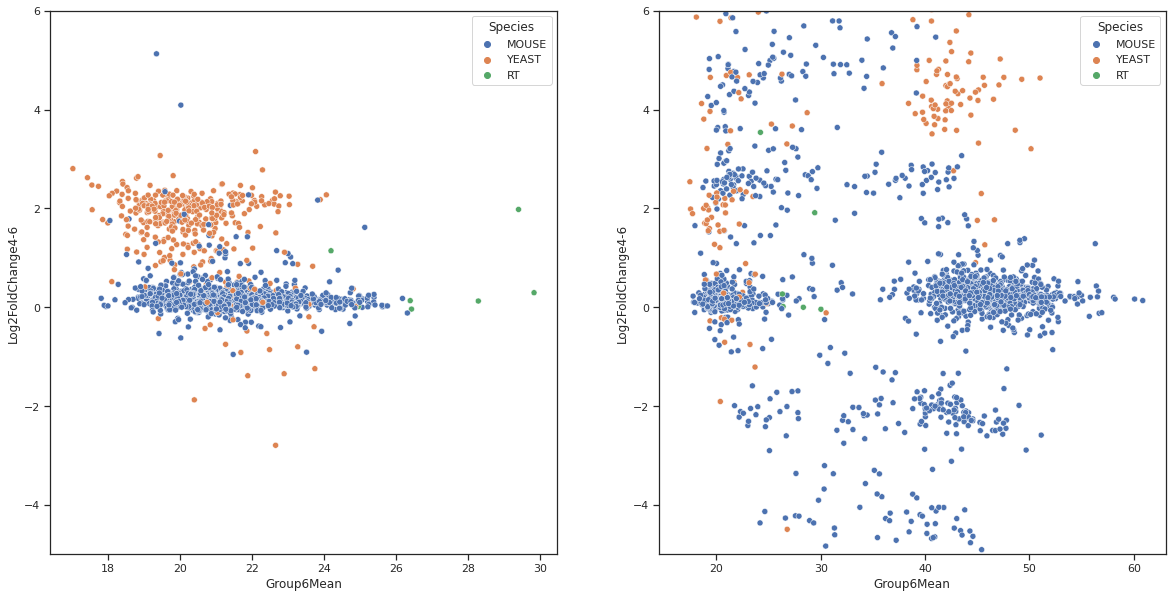

time: 373 ms (started: 2022-06-22 16:03:41 +02:00)


In [8]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


sns.scatterplot(
    data=normalized_data[0].row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
    ax=ax1
)

sns.scatterplot(
    data=normalized_data[1].row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
    ax=ax2
)


ax1.set(ylim=(-5, 6))
ax2.set(ylim=(-5, 6))

fig.figure.set_size_inches(20, 10)

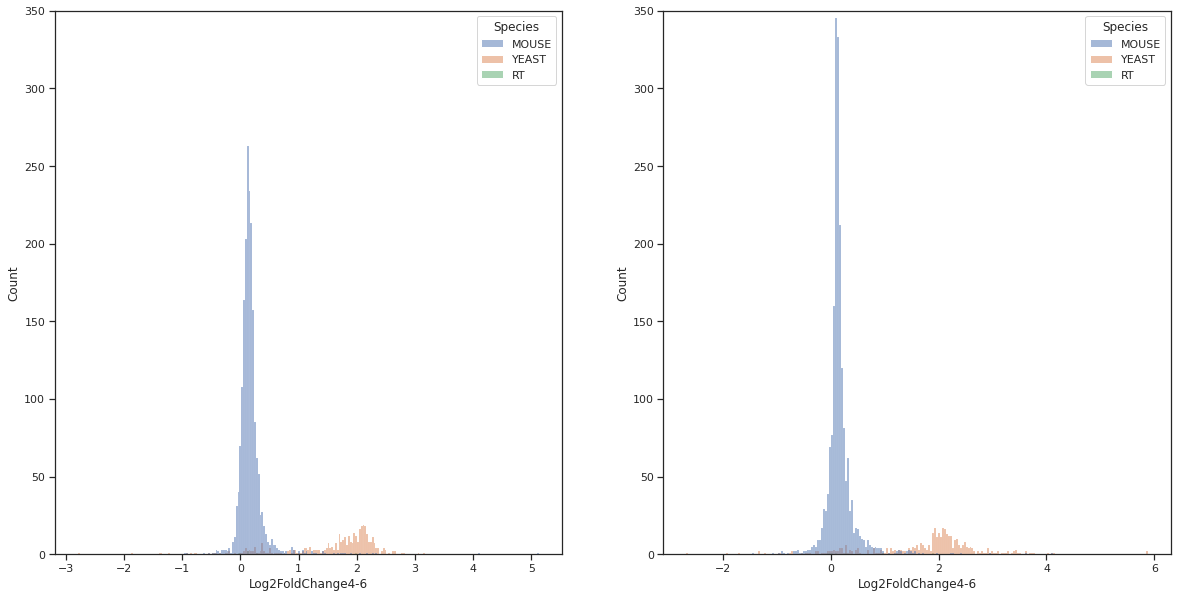

time: 2.22 s (started: 2022-05-19 11:36:50 +02:00)


In [10]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])


sns.histplot(
    data=normalized_data[0].row_annotations,
    x="Log2FoldChange4-6",
    hue="Species",
    ax=ax1
)

sns.histplot(
    data=normalized_data[1].row_annotations,
    x="Log2FoldChange4-6",
    hue="Species",
    ax=ax2
)


ax1.set(ylim=(0,350))
ax2.set(ylim=(0,350))

fig.figure.set_size_inches(20, 10)

In [6]:
cutoffs = np.linspace(0.0, 1.0, num=10000)

time: 312 µs (started: 2022-03-22 11:30:15 +01:00)


In [7]:
precision_roc_data = []

data_matrices = [
    {
        "name": "RT Sliding Window",
        "data": normalized_data[0]
    },
    {
        "name": "Global",
        "data": normalized_data[1]
    },
]
 
    
for data_matrix in data_matrices:
    
    data_name = data_matrix["name"]
    compared_data = data_matrix["data"]

    for cutoff in cutoffs[1:]:

        yeast_ids = compared_data.row_annotations[
            (compared_data.row_annotations["CorrectedPValue"] <= cutoff) &
            (compared_data.row_annotations["Species"] == "YEAST")
        ].shape[0]

        yeast_fn = compared_data.row_annotations[
            (compared_data.row_annotations["CorrectedPValue"] > cutoff) &
            (compared_data.row_annotations["Species"] == "YEAST")
        ].shape[0]

        mouse_ids = compared_data.row_annotations[
            (compared_data.row_annotations["CorrectedPValue"] <= cutoff) &
            (compared_data.row_annotations["Species"] == "MOUSE")
        ].shape[0]

        mouse_tn = compared_data.row_annotations[
            (compared_data.row_annotations["CorrectedPValue"] > cutoff) &
            (compared_data.row_annotations["Species"] == "MOUSE")
        ].shape[0]

        recall = yeast_ids / (yeast_ids + yeast_fn)

        precision = yeast_ids / (yeast_ids + mouse_ids)
        fpr = mouse_ids / (mouse_ids + mouse_tn)

        precision_roc_data.append(
            {
                "recall": recall,
                "precision": precision,
                "fpr": fpr,
                "name": data_name
            }
        )

time: 46.4 s (started: 2022-03-22 11:30:15 +01:00)


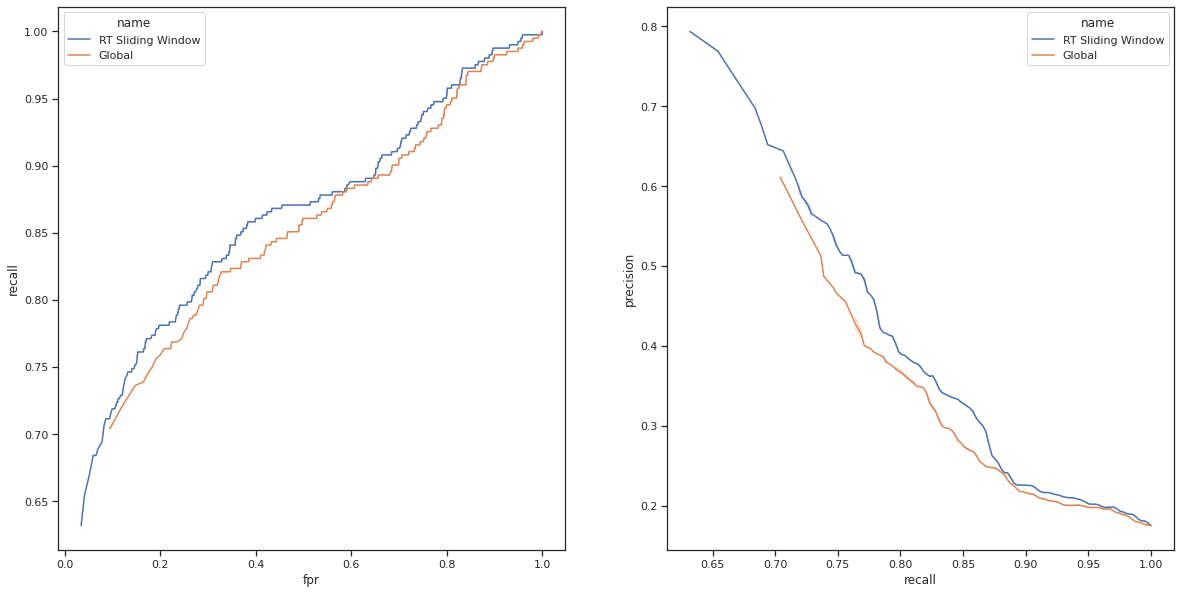

time: 29.2 s (started: 2022-03-22 11:31:02 +01:00)


In [8]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="fpr",
    y="recall",
    ax=ax1,
    hue="name"
)

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="recall",
    y="precision",
    ax=ax2,
    hue="name"
)
fig.figure.set_size_inches(20, 10)

In [10]:
normalized_data[0].to_df()

,Protein,Group4Mean,Group6Mean,Log2FoldChange4-6,PValues4-6,Group4RepCounts,Group6RepCounts,CorrectedPValue,Species,AAS_P2009_167,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
25,sp|P14540|ALF_YEAST,26.253061,23.816871,2.436190,2.725459e-25,9,9,3.875603e-22,YEAST,24.600626,...,24.743368,24.642200,24.727243,24.564033,24.695061,24.742849,24.737427,24.723912,24.728157,24.669978
2208,sp|P32589|HSP7F_YEAST,23.679294,21.640080,2.039214,1.671257e-23,9,9,1.188263e-20,YEAST,26.472333,...,26.634259,26.495502,26.937341,26.590874,26.617168,26.777812,22.675795,26.881898,22.611484,26.626026
610,sp|P38011|GBLP_YEAST,25.112220,23.025840,2.086381,3.888094e-23,9,9,1.842957e-20,YEAST,24.967248,...,25.262130,25.241103,25.160140,25.054989,25.118380,25.123861,25.124567,25.174670,25.163952,25.088678
1393,sp|P29547|EF1G1_YEAST,22.892592,20.937548,1.955044,6.487946e-22,9,9,2.306465e-19,YEAST,22.935289,...,25.067568,23.066973,24.929678,22.970552,23.047721,24.959780,23.140914,24.955770,23.059681,24.939106
362,sp|P07251|ATPA_YEAST,23.792908,21.806276,1.986632,9.058565e-22,9,9,2.576256e-19,YEAST,25.891017,...,25.811745,25.901971,25.908381,25.903472,25.978797,25.939571,25.938459,25.960869,25.944697,25.912236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,sp|P38759|VPS29_YEAST,NaN,NaN,NaN,NaN,0,0,NaN,YEAST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,sp|Q9EQF5|DPYS_MOUSE,NaN,NaN,NaN,NaN,0,0,NaN,MOUSE,NaN,...,NaN,NaN,19.334163,NaN,19.474720,NaN,20.563190,18.990354,NaN,NaN
3858,sp|O89051|ITM2B_MOUSE,NaN,NaN,NaN,NaN,0,0,NaN,MOUSE,24.351278,...,24.673202,24.739711,24.951427,24.583558,24.880890,24.521585,24.805063,24.758660,24.591733,24.731000
3859,sp|Q8VEE0|RPE_MOUSE,NaN,NaN,NaN,NaN,0,0,NaN,MOUSE,NaN,...,20.892158,22.875284,21.269666,19.049026,21.427398,18.027865,19.653230,21.908804,20.538483,21.889618


time: 25.6 ms (started: 2022-03-22 16:29:48 +01:00)
